In [12]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [15]:
from citipy import citipy

In [16]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

602

In [17]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [18]:
# Import the requests library
import requests
# Import the API key
from config import weather_api_key

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Create an empty list to hold weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our cities list
for i, city in enumerate(cities):
    # Group cities into sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | awjilah
Processing Record 2 of Set 1 | adre
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | tokoname
Processing Record 5 of Set 1 | port hardy
Processing Record 6 of Set 1 | karratha
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | hofn
Processing Record 10 of Set 1 | adrar
Processing Record 11 of Set 1 | chara
Processing Record 12 of Set 1 | godda
Processing Record 13 of Set 1 | great falls
Processing Record 14 of Set 1 | ixtapa
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | daru
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | kawalu
Processing Record 23 of Set 1 | kidal
Processing 

Processing Record 40 of Set 4 | ribeira brava
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | san rafael
Processing Record 43 of Set 4 | colac
Processing Record 44 of Set 4 | talara
Processing Record 45 of Set 4 | hasaki
Processing Record 46 of Set 4 | cloquet
Processing Record 47 of Set 4 | olafsvik
Processing Record 48 of Set 4 | sijunjung
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | peniche
Processing Record 1 of Set 5 | bokoro
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | flinders
Processing Record 4 of Set 5 | san andres
Processing Record 5 of Set 5 | golub-dobrzyn
Processing Record 6 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 5 | podlesnoye
Processing Record 8 of Set 5 | opuwo
Processing Record 9 of Set 5 | lazaro cardenas
Processing Record 10 of Set 5 | dafeng
Processing Record 11 of Set 5 | mulege
Processing Record 12 of Set 5 | fonte boa
Processing Record 13 of Set 5

Processing Record 30 of Set 8 | boa vista
Processing Record 31 of Set 8 | somanda
Processing Record 32 of Set 8 | hanzhong
Processing Record 33 of Set 8 | iqaluit
Processing Record 34 of Set 8 | baker city
Processing Record 35 of Set 8 | denpasar
Processing Record 36 of Set 8 | bakchar
Processing Record 37 of Set 8 | tocache
Processing Record 38 of Set 8 | jalu
Processing Record 39 of Set 8 | san jorge
Processing Record 40 of Set 8 | kloulklubed
Processing Record 41 of Set 8 | loukhi
Processing Record 42 of Set 8 | banda aceh
Processing Record 43 of Set 8 | saleaula
City not found. Skipping...
Processing Record 44 of Set 8 | ulladulla
Processing Record 45 of Set 8 | coupar angus
Processing Record 46 of Set 8 | rio gallegos
Processing Record 47 of Set 8 | oktyabrskoye
Processing Record 48 of Set 8 | syamzha
Processing Record 49 of Set 8 | natal
Processing Record 50 of Set 8 | chaman
Processing Record 1 of Set 9 | north bend
Processing Record 2 of Set 9 | cockburn town
Processing Record 

Processing Record 20 of Set 12 | moose factory
Processing Record 21 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 22 of Set 12 | boddam
Processing Record 23 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 24 of Set 12 | mosquera
Processing Record 25 of Set 12 | vitry-le-francois
Processing Record 26 of Set 12 | burns lake
Processing Record 27 of Set 12 | agucadoura
Processing Record 28 of Set 12 | katherine
Processing Record 29 of Set 12 | kailua
Processing Record 30 of Set 12 | neuquen
Processing Record 31 of Set 12 | luis correia
Processing Record 32 of Set 12 | smidovich
Processing Record 33 of Set 12 | puqi
Processing Record 34 of Set 12 | manokwari
Processing Record 35 of Set 12 | souris
Processing Record 36 of Set 12 | shache
Processing Record 37 of Set 12 | tangshan
Processing Record 38 of Set 12 | bhatkal
Processing Record 39 of Set 12 | alofi
Processing Record 40 of Set 12 | port blair
Processing Record 41 of Set 12 | batemans bay
Pro

In [21]:
len(city_data)

559

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Awjilah,29.1081,21.2869,70.50,44,0,9.15,LY,2021-11-11 19:11:19
1,Adre,13.4667,22.2000,80.11,22,11,2.86,TD,2021-11-11 19:11:20
2,Khatanga,71.9667,102.5000,-26.57,100,32,5.06,RU,2021-11-11 19:11:20
3,Tokoname,34.8833,136.8500,55.27,71,75,9.22,JP,2021-11-11 19:11:20
4,Port Hardy,50.6996,-127.4199,47.64,85,100,24.34,CA,2021-11-11 19:11:21
5,Karratha,-20.7377,116.8463,74.28,53,78,5.91,AU,2021-11-11 19:11:21
6,Ushuaia,-54.8000,-68.3000,58.62,45,100,11.70,AR,2021-11-11 19:08:46
7,Mataura,-46.1927,168.8643,59.90,81,100,4.12,NZ,2021-11-11 19:11:22
8,Hofn,64.2539,-15.2082,32.22,85,100,12.17,IS,2021-11-11 19:11:22
9,Adrar,20.5022,-10.0711,77.16,14,100,8.39,MR,2021-11-11 19:11:23


In [24]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Awjilah,LY,2021-11-11 19:11:19,29.1081,21.2869,70.50,44,0,9.15
1,Adre,TD,2021-11-11 19:11:20,13.4667,22.2000,80.11,22,11,2.86
2,Khatanga,RU,2021-11-11 19:11:20,71.9667,102.5000,-26.57,100,32,5.06
3,Tokoname,JP,2021-11-11 19:11:20,34.8833,136.8500,55.27,71,75,9.22
4,Port Hardy,CA,2021-11-11 19:11:21,50.6996,-127.4199,47.64,85,100,24.34
...,...,...,...,...,...,...,...,...,...
554,Umm Lajj,SA,2021-11-11 19:28:16,25.0213,37.2685,78.31,56,100,1.88
555,Moindou,NC,2021-11-11 19:28:16,-21.6924,165.6770,71.55,81,90,5.01
556,San Ramon,US,2021-11-11 19:28:17,37.7799,-121.9780,69.39,60,1,1.01
557,Naifaru,MV,2021-11-11 19:28:17,5.4444,73.3657,82.15,77,4,20.56


In [25]:
# Create the output file CSV
output_data_file = "weather_data/cities.csv"
# Export the city data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [27]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

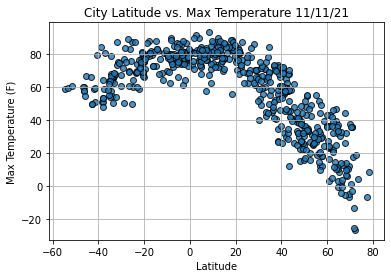

In [28]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig1.png')
# Show plot
plt.show()

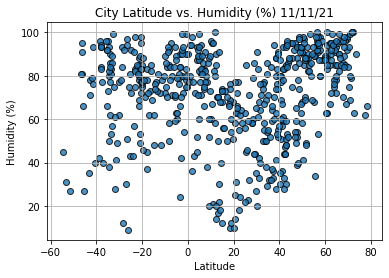

In [31]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (%) ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig2.png')
# Show plot
plt.show()

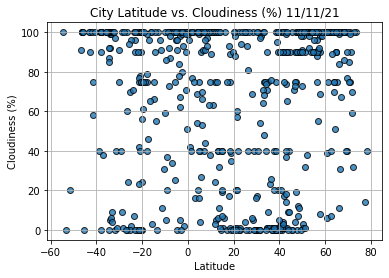

In [32]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig3.png')
# Show plot
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig3.png')
# Show plot
plt.show()